<a href="https://colab.research.google.com/github/arturbernardo/data_stars/blob/main/Hertzsprung_Russell_diagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyvo
!pip install mocpy
!pip install astropy
!pip install ipyaladin
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 999.4/999.4 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 765.5/765.5 kB 26.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 85.7 MB/s eta 0:00:00


In [7]:
from pyvo import registry  # version >=1.6
from mocpy import MOC
from astropy.coordinates import SkyCoord
from ipyaladin import Aladin  # version >=0.4.0
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.colors import LinearSegmentedColormap

https://astroquery.readthedocs.io/en/latest/gaia/gaia.html

In [4]:
from astroquery.gaia import Gaia
gaiadr3_table = Gaia.load_table('gaiadr3.gaia_source')
print(gaiadr3_table)

TAP Table name: gaiadr3.gaia_source
Description: This table has an entry for every Gaia observed source as published with this data release. It contains the basic source parameters, in their final state as processed by the Gaia Data Processing and Analysis Consortium from the raw data coming from the spacecraft. The table is complemented with others containing information specific to certain kinds of objects (e.g.~Solar--system objects, non--single stars, variables etc.) and value--added processing (e.g.~astrophysical parameters etc.). Further array data types (spectra, epoch measurements) are presented separately via Datalink resources.
Size (bytes): 3646930329600
Num. columns: 152


In [85]:
job = Gaia.launch_job("""
    SELECT TOP 3000
        parallax, bp_rp, phot_g_mean_mag,
        phot_bp_mean_flux_over_error,
        phot_rp_mean_flux_over_error,
        visibility_periods_used,
        astrometric_chi2_al,
        astrometric_n_good_obs_al,
        astrometric_primary_flag
    FROM gaiadr3.gaia_source
    WHERE
        parallax > 0
        AND parallax_over_error > 5
        AND phot_g_mean_mag IS NOT NULL
        AND bp_rp IS NOT NULL
        AND phot_bp_mean_flux_over_error > 5
        AND phot_rp_mean_flux_over_error > 5
        AND visibility_periods_used > 5
        AND astrometric_chi2_al / (astrometric_n_good_obs_al - 5) < 2.5
    ORDER BY random_index
""")

r = job.get_results()
df = r.to_pandas()

In [96]:
print(df['log_L'].describe())
print(df['L'].describe())
print(df['M'].describe())

count    3000.000000
mean        1.583851
std         1.021468
min        -2.703723
25%         0.999359
50%         1.721987
75%         2.230031
max         4.778388
Name: log_L, dtype: float64
count     3000.000000
mean       406.153875
std       2136.930057
min          0.001978
25%          9.985387
50%         52.721418
75%        169.836965
max      60032.728849
Name: L, dtype: float64
count    3000.000000
mean        0.870372
std         2.553670
min        -7.115970
25%        -0.745078
50%         0.525032
75%         2.331602
max        11.589307
Name: M, dtype: float64


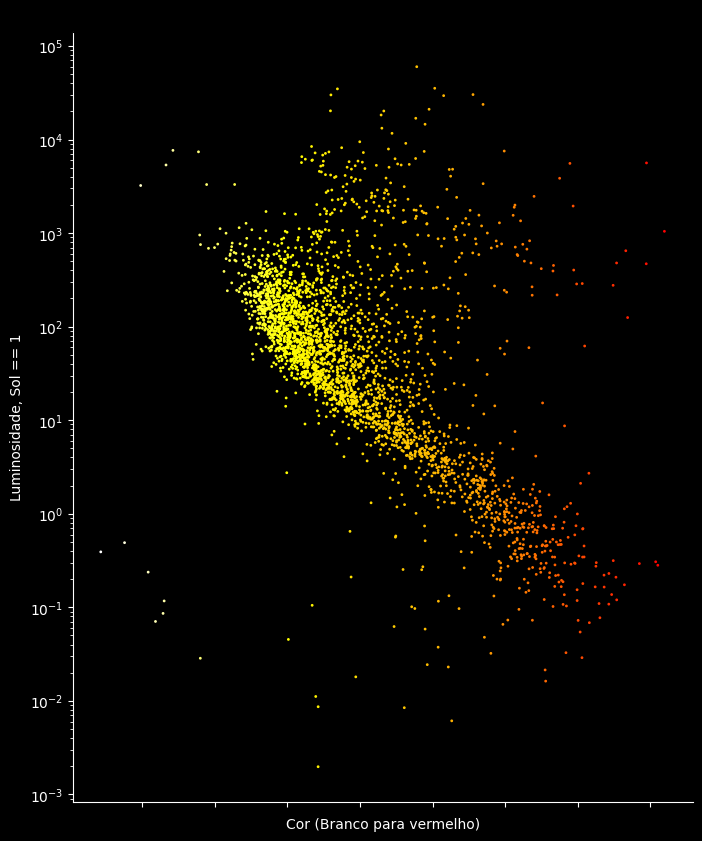

In [94]:
M_sun = 4.83

df['M'] = df['phot_g_mean_mag'] + 5 * np.log10(df['parallax']/100) - 5

df['log_L'] = -0.4 * (df['M'] - M_sun)
df['L'] = 10 ** df['log_L']

norm = plt.Normalize(vmin=df['log_L'].min(), vmax=df['log_L'].max())

colors = ['white', 'yellow', 'orange', 'red']
n_bins = 500
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=n_bins)

fig, ax = plt.subplots()
ax.set_xticklabels([])
fig.set_figheight(10)
fig.set_figwidth(8)

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

ax.spines['left'].set_color('orange')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')
ax.tick_params(colors='white', which='both')

ax.set_yscale('log')
plt.scatter(df['bp_rp'], df['L'], s=1, c=df['bp_rp'], cmap=cmap)
plt.xlabel('Cor (Branco para vermelho)')
plt.ylabel('Luminosidade, Sol == 1')
plt.title('Diagrama HR')
plt.grid(False)

plt.show()


In [ ]:
# BP - RP ~ 0.2 a 0.5 → Estrela quente, tipo espectral de A ou F (branca a amarela).

# BP - RP ~ 0.5 a 1.0 → Estrela de tipo G (amarela, como o Sol).

# BP - RP ~ 1.0 a 1.5 → Estrela de tipo K (laranja).

# BP - RP > 1.5 → Estrela de tipo M (vermelha).